In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
riders = pd.read_pickle("clean-data/riders.pkl")
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


In [3]:
train = pd.read_pickle("clean-data/train.pkl")
train.head()

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993,425,1248
2,1899,265,3,Business,30,2,45565,30,2,45764,...,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455,199,619
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341,31,1021
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214,60,545


In [4]:
dropped = ["placement_date", "placement_weekday", "placement_time",
           "confirm_date", "confirm_weekday", "confirm_time",
           "arrival_pickup_date", "arrive_pickup_weekday", "arrive_time",
           "pickup_date", "pickup_weekday", "pickup_time",
           "arrival_dest_date", "arrival_dest_weekday", "arrival_dest_time"]
train.drop(columns=dropped, inplace=True)

In [5]:
# Combining riders and train into one df
train = train.merge(riders, on="rider_id")

In [6]:
train.dtypes

order_id                        int64
user_id                         int64
platform                     category
personal_or_business         category
distance                        int64
temperature                   float64
pickup_lat                    float64
pickup_long                   float64
dest_lat                      float64
dest_long                     float64
rider_id                        int64
pickup_to_arrival_time          int64
placement_to_confirm_time       int64
confirm_to_pickup_time          int64
no_of_orders                    int64
age                             int64
average_rating                float64
no_of_ratings                   int64
dtype: object

In [7]:
# Creating dummy variables for platforms 1, 2, 3. They will all be 0 for
# platform 4.

train["platform1"] = 0
train["platform2"] = 0
train["platform3"] = 0
train.loc[train.platform == 1, "platform1"] = 1
train.loc[train.platform == 2, "platform2"] = 1
train.loc[train.platform == 3, "platform3"] = 1

In [8]:
# Creating dummy variable for personal_or_business (1 if personal 0 if business)

train["personal"] = 0
train.loc[train.personal_or_business == "Personal", "personal"] = 1

In [9]:
# Standardizing numerical variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train = train.select_dtypes(include=numerics)
standardized = pd.DataFrame(scaler.fit_transform(numeric_train))
standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.212381,-1.068667,-0.971381,-0.887436,-1.189427,0.509952,-0.511955,0.414185,-0.124246,-0.822463,-0.107959,1.348181,-0.035088,0.501417,-0.090079,0.516219,-0.335548,-0.220056,0.417329,-0.468425
1,1.632088,0.695277,1.850969,0.385175,-1.485082,-0.625850,-2.115236,2.081410,-0.124246,1.346089,-0.257204,0.415074,-0.035088,0.501417,-0.090079,0.516219,-0.335548,-0.220056,0.417329,2.134811
2,0.007132,1.307258,-0.618587,0.447253,0.861477,-0.775379,0.263225,0.156227,-0.124246,1.071602,0.489019,-0.308518,-0.035088,0.501417,-0.090079,0.516219,-0.335548,-0.220056,0.417329,-0.468425
3,0.932512,1.468813,1.498175,-2.501479,-0.289946,-1.437864,1.695949,-0.204814,-0.124246,1.447376,-0.253637,0.057366,-0.035088,0.501417,-0.090079,0.516219,-0.335548,-0.220056,0.417329,2.134811
4,-0.711547,-1.548067,-0.442191,-1.259907,0.260480,-0.321303,-0.512670,-1.314744,-0.124246,0.045566,-0.213798,-0.495548,-0.035088,0.501417,-0.090079,0.516219,-0.335548,4.544300,-2.396191,2.134811


In [10]:
# Running PCA

from sklearn.decomposition import PCA
pca = PCA()
pc_scores = pd.DataFrame(pca.fit_transform(standardized), 
                         columns = ['PC'+str(i) for i in np.arange(1,standardized.shape[1]+1)])
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.405819,0.593750,0.020444,2.115481,0.466447,0.223985,0.020416,0.455771,-1.331995,-0.143154,-0.605415,-1.029737,-0.201604,0.575692,0.678050,-0.511815,-0.054226,0.114730,-0.504170,-0.003465
1,0.617423,0.431573,2.794420,-0.499551,-1.121765,-0.503896,-0.407541,-1.047174,1.285077,0.455051,-0.265443,-0.332332,-2.238421,-0.396853,1.567744,-0.148860,0.205502,-2.090492,-0.332111,0.008715
2,-0.586300,0.713211,-0.482560,-1.583391,-0.144612,-0.108623,0.767864,0.470014,0.487094,0.331720,0.495561,0.214583,-0.165870,-0.050131,0.211776,-0.982113,-0.294568,0.140191,-0.297035,-0.000493
3,1.391991,0.232642,1.005835,-1.954361,-0.403735,0.595907,0.414168,-0.594293,0.672567,0.290822,1.437734,-1.808131,1.931602,-0.255805,1.516109,0.040120,0.098216,-2.077891,-0.182353,0.005518
4,4.174129,-0.623290,-0.578198,0.896200,-2.618581,3.114059,-0.289049,0.438289,-0.600655,0.468952,-0.744280,0.317793,0.401299,0.675517,-0.959121,-0.165398,-0.082634,0.241504,-0.319155,-0.003934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21191,0.725670,4.921187,-1.656236,-0.405702,0.654433,0.225876,-0.008190,-0.141952,1.424430,0.125870,1.576453,-0.646079,-0.405777,-0.304750,-0.143577,0.379082,-1.815761,0.003550,-1.302406,-0.003638
21192,0.597748,-1.379985,0.040640,-0.062398,-0.272133,0.032336,0.123176,1.160045,-0.815773,-0.099427,-0.034233,-0.567412,0.897740,0.254492,-0.749789,-1.109771,-0.056612,-2.022889,-0.050758,0.014361
21193,-1.365458,-2.345223,1.638304,1.633653,-1.266620,-0.556446,10.490220,2.458227,5.643578,-1.159553,-6.662544,-4.789885,2.183631,0.924188,-1.582805,0.791230,-1.877448,-0.049807,-0.223696,0.003308
21194,-1.247233,-1.275493,-1.569687,0.438682,-0.524371,-0.615233,-1.749986,0.457390,0.208304,-0.816326,-0.115709,0.762203,-0.589516,-0.067806,0.333929,-0.388875,0.062546,0.115552,-0.214560,0.001514


Text(0.5, 1.0, 'Scree Plot')

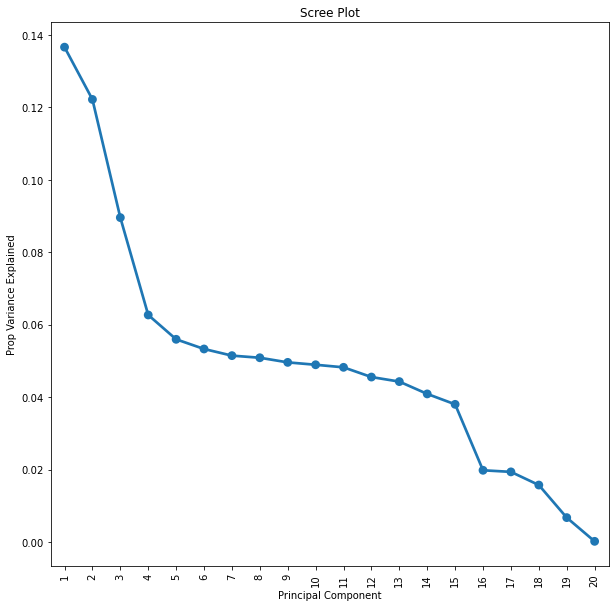

In [11]:
# Determining optimal number of components

scree_data = pd.DataFrame({'Principal Component':np.arange(1,standardized.shape[1]+1), 'Prop Variance Explained': pca.explained_variance_ratio_})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.pointplot(x="Principal Component", y="Prop Variance Explained", data=scree_data).set_title('Scree Plot')

In [12]:
scree_data.head()

,Principal Component,Prop Variance Explained
0,1,0.136639
1,2,0.122202
2,3,0.089574
3,4,0.062688
4,5,0.055968


In [13]:
y = pca.explained_variance_ratio_[:14].cumsum()
x = np.arange(15)[1:]
[x,y]

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([0.1366389 , 0.25884042, 0.34841477, 0.41110231, 0.46707069,
        0.52036849, 0.57182709, 0.62270208, 0.67230042, 0.72123857,
        0.76946948, 0.81501453, 0.85930348, 0.90019357])]

Text(0.5, 1.0, 'Cumulative Scree Plot')

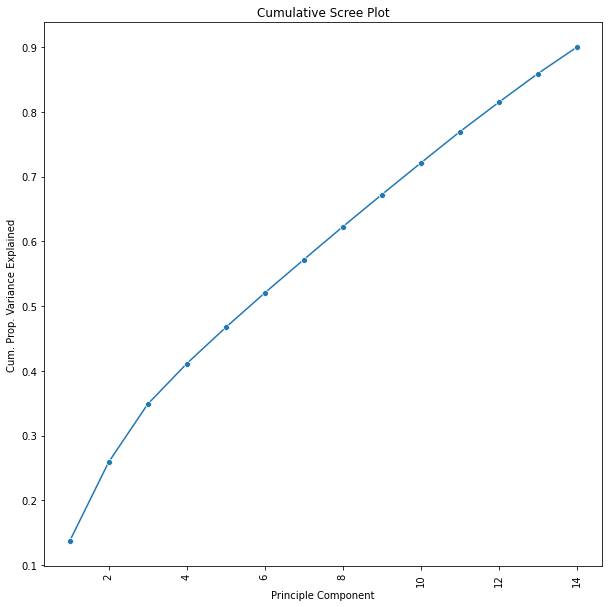

In [14]:
# Cumulative variance

y = pca.explained_variance_ratio_[:14].cumsum()
x = np.arange(15)[1:]
cum_data = pd.DataFrame({'Principle Component':x, 'Cum. Prop. Variance Explained':y})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.lineplot(x='Principle Component', y='Cum. Prop. Variance Explained', data = cum_data, marker='o').set_title("Cumulative Scree Plot")


In [15]:
train_pcs = pc_scores.iloc[:,:14]
train_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.405819,0.593750,0.020444,2.115481,0.466447,0.223985,0.020416,0.455771,-1.331995,-0.143154,-0.605415,-1.029737,-0.201604,0.575692
1,0.617423,0.431573,2.794420,-0.499551,-1.121765,-0.503896,-0.407541,-1.047174,1.285077,0.455051,-0.265443,-0.332332,-2.238421,-0.396853
2,-0.586300,0.713211,-0.482560,-1.583391,-0.144612,-0.108623,0.767864,0.470014,0.487094,0.331720,0.495561,0.214583,-0.165870,-0.050131
3,1.391991,0.232642,1.005835,-1.954361,-0.403735,0.595907,0.414168,-0.594293,0.672567,0.290822,1.437734,-1.808131,1.931602,-0.255805
4,4.174129,-0.623290,-0.578198,0.896200,-2.618581,3.114059,-0.289049,0.438289,-0.600655,0.468952,-0.744280,0.317793,0.401299,0.675517


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

1579.490522630447
[-0.00159281]


<AxesSubplot:xlabel='order_id', ylabel='pickup_to_arrival_time'>

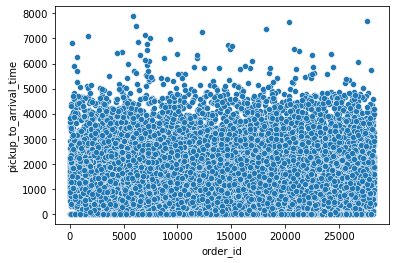

In [17]:
model.fit(X=train[["order_id"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="order_id", y="pickup_to_arrival_time", data=train)
# Order ID should not be used to predict outcome

595.8119955781608
[101.10676576]


<AxesSubplot:xlabel='distance', ylabel='pickup_to_arrival_time'>

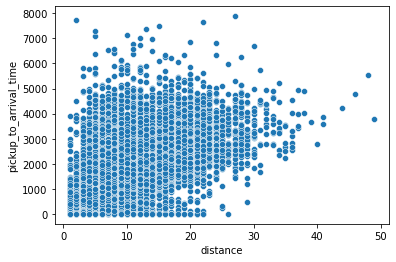

In [18]:
model.fit(X=train[["distance"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="distance", y="pickup_to_arrival_time", data=train)

1550.280407098239
[0.01511055]


<AxesSubplot:xlabel='placement_to_confirm_time', ylabel='pickup_to_arrival_time'>

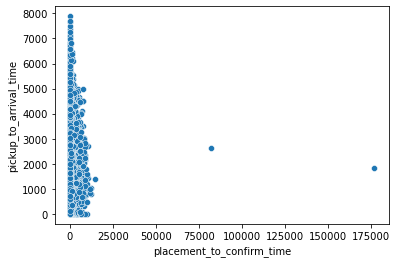

In [19]:
model.fit(X=train[["placement_to_confirm_time"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="placement_to_confirm_time", y="pickup_to_arrival_time", data=train)

1459.544601144846
[0.06408737]


<AxesSubplot:xlabel='confirm_to_pickup_time', ylabel='pickup_to_arrival_time'>

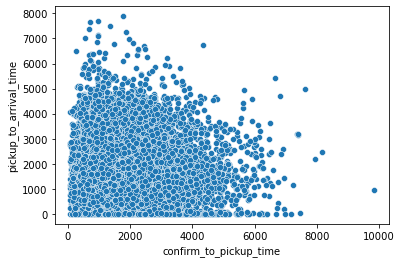

In [20]:
model.fit(X=train[["confirm_to_pickup_time"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="confirm_to_pickup_time", y="pickup_to_arrival_time", data=train)

In [21]:
train.shape

(21196, 22)

In [22]:
train[train.placement_to_confirm_time < 0]

,order_id,user_id,platform,personal_or_business,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,...,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings,platform1,platform2,platform3,personal


In [23]:
train.iloc[3173]

order_id                         21010
user_id                           2982
platform                             3
personal_or_business          Business
distance                            22
temperature                       27.5
pickup_lat                   -1.195652
pickup_long                  36.948807
dest_lat                     -1.177202
dest_long                    36.835118
rider_id                           519
pickup_to_arrival_time            4072
placement_to_confirm_time            8
confirm_to_pickup_time             567
no_of_orders                      1591
age                                801
average_rating                    14.1
no_of_ratings                      187
platform1                            0
platform2                            0
platform3                            1
personal                             0
Name: 3173, dtype: object

1601.005727419749
[-0.02599667]


<AxesSubplot:xlabel='no_of_orders', ylabel='pickup_to_arrival_time'>

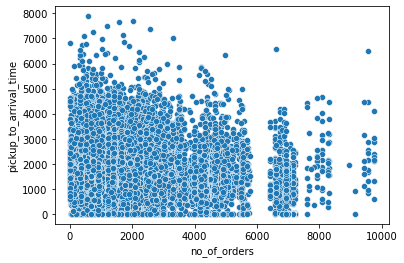

In [24]:
model.fit(X=train[["no_of_orders"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="no_of_orders", y="pickup_to_arrival_time", data=train)

2193.9409979243746
[-45.87982625]


<AxesSubplot:xlabel='average_rating', ylabel='pickup_to_arrival_time'>

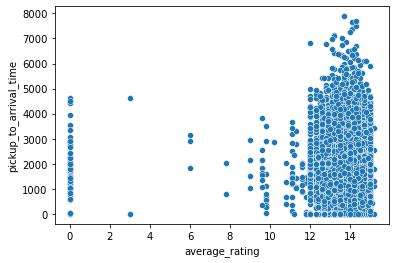

In [25]:
model.fit(X=train[["average_rating"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="average_rating", y="pickup_to_arrival_time", data=train)

In [26]:
rate_well = train[train.average_rating > 10]

2591.6831509479107
[-74.38869965]


<AxesSubplot:xlabel='average_rating', ylabel='pickup_to_arrival_time'>

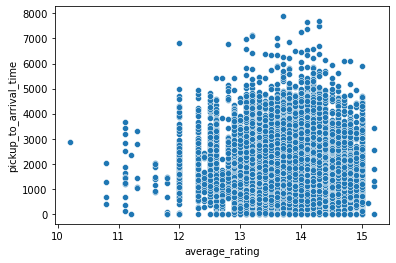

In [27]:
model.fit(X=rate_well[["average_rating"]], y=rate_well["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="average_rating", y="pickup_to_arrival_time", data=rate_well)

In [28]:
model.fit(X=rate_well[["pickup_to_arrival_time"]], y= rate_well["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)

2.2737367544323206e-12
[1.]


In [29]:
train.head()

,order_id,user_id,platform,personal_or_business,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,...,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings,platform1,platform2,platform3,personal
0,4211,633,3,Business,4,20.4,-1.317755,36.830370,-1.300406,36.829741,...,264,2840,1637,1309,13.8,549,0,0,1,0
1,27440,2642,3,Personal,20,24.5,-1.326774,36.787807,-1.356237,36.904295,...,13,1927,1637,1309,13.8,549,0,0,1,1
2,14170,3339,3,Business,6,24.7,-1.255189,36.782203,-1.273412,36.818206,...,1268,1219,1637,1309,13.8,549,0,0,1,0
3,21727,3523,3,Personal,18,15.2,-1.290315,36.757377,-1.223520,36.802061,...,19,1577,1637,1309,13.8,549,0,0,1,1
4,8301,87,2,Personal,7,19.2,-1.273524,36.799220,-1.300431,36.752427,...,86,1036,1637,1309,13.8,549,0,1,0,1


In [30]:
# Model Training and Testing

In [31]:
# split data into 80% train and 20% test portions
from sklearn.model_selection import train_test_split
train, test = train_test_split(train, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 16956 rows
Test set has 4240 rows


In [32]:
# model testing
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X=train[["placement_to_confirm_time"]], y=train["pickup_to_arrival_time"])

print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model1.intercept_,2), '+', np.round(model1.coef_[0],2), '* placement_to_confirm_time')

The estimated regression function is:
pickup_to_arrival_time = 1547.8 + 0.01 * placement_to_confirm_time


<AxesSubplot:xlabel='placement_to_confirm_time', ylabel='pickup_to_arrival_time'>

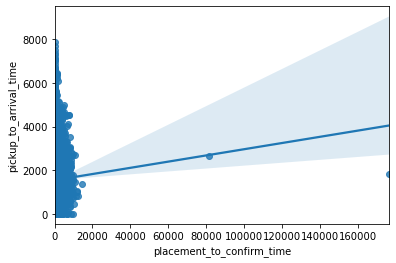

In [33]:
sns.regplot(x=train[["placement_to_confirm_time"]], y=train["pickup_to_arrival_time"])

In [34]:
# Above comparisons to pickup_to_arrival_time:
# order_id, temperature, distance, platform, placement_to_confirm, confirm_to_pickup


# Below comparisons to pickup_to_arrival_time:
# rider_id, platform, personal, pickup_lat, pickup_long, dest_lat, dest_long


# Did not compare:
# user_id, personal_or_business
# platform1, platform2, platform3 (platform summarizes all three)

<AxesSubplot:xlabel='rider_id', ylabel='pickup_to_arrival_time'>

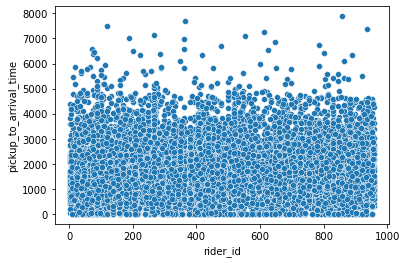

In [35]:
model_rider_id = LinearRegression()
model_rider_id.fit(X=train[["rider_id"]], y=train["pickup_to_arrival_time"])
sns.scatterplot(x="rider_id", y="pickup_to_arrival_time", data=train)

In [36]:
print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model_rider_id.intercept_,2),
      '+', np.round(model_rider_id.coef_[0],2), '* rider_id')

The estimated regression function is:
pickup_to_arrival_time = 1529.28 + 0.05 * rider_id


<AxesSubplot:xlabel='platform', ylabel='pickup_to_arrival_time'>

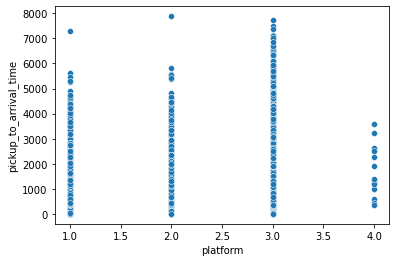

In [37]:
model_platform = LinearRegression()
model_platform.fit(X=train[["platform"]], y=train["pickup_to_arrival_time"])
sns.scatterplot(x="platform", y="pickup_to_arrival_time", data=train)

In [38]:
print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model_platform.intercept_,2), 
      '+', np.round(model_platform.coef_[0],2), '* platform')

The estimated regression function is:
pickup_to_arrival_time = 1576.74 + -8.18 * platform


<AxesSubplot:xlabel='pickup_lat', ylabel='pickup_to_arrival_time'>

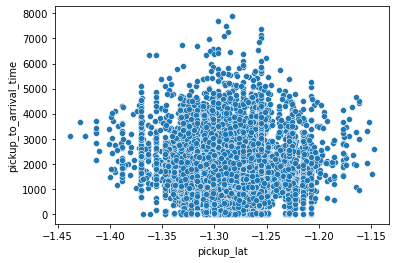

In [39]:
model_pickup_lat = LinearRegression()
model_pickup_lat.fit(X=train[["pickup_lat"]], y=train["pickup_to_arrival_time"])
sns.scatterplot(x="pickup_lat", y="pickup_to_arrival_time", data=train)

In [40]:
print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model_pickup_lat.intercept_,2),
      '+', np.round(model_pickup_lat.coef_[0],2), '* pickup_lat')

The estimated regression function is:
pickup_to_arrival_time = -568.43 + -1656.56 * pickup_lat


<AxesSubplot:xlabel='pickup_long', ylabel='pickup_to_arrival_time'>

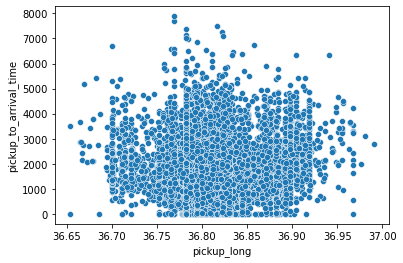

In [41]:
model_pickup_long = LinearRegression()
model_pickup_long.fit(X=train[["pickup_long"]], y=train["pickup_to_arrival_time"])
sns.scatterplot(x="pickup_long", y="pickup_to_arrival_time", data=train)

In [42]:
print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model_pickup_long.intercept_,2), 
      '+', np.round(model_pickup_long.coef_[0],2), '* pickup_long')

The estimated regression function is:
pickup_to_arrival_time = -55280.09 + 1543.93 * pickup_long


<AxesSubplot:xlabel='pickup_long', ylabel='pickup_lat'>

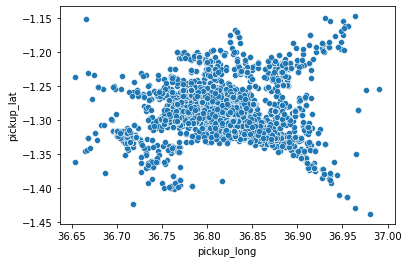

In [46]:
model_pickup = LinearRegression()
model_pickup.fit(X=train[["pickup_long"]], y=train["pickup_lat"])
sns.scatterplot(x="pickup_long", y="pickup_lat", data=train)

<AxesSubplot:xlabel='dest_lat', ylabel='pickup_to_arrival_time'>

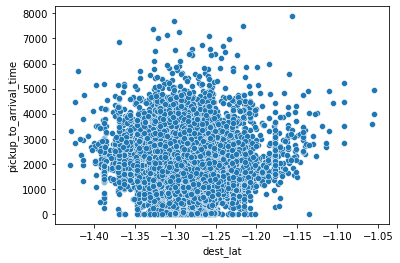

In [43]:
model_dest_lat = LinearRegression()
model_dest_lat.fit(X=train[["dest_lat"]], y=train["pickup_to_arrival_time"])
sns.scatterplot(x="dest_lat", y="pickup_to_arrival_time", data=train)

In [105]:
print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model_dest_lat.intercept_,2), 
      '+', np.round(model_dest_lat.coef_[0],2), '* dest_lat')

The estimated regression function is:
pickup_to_arrival_time = -750.91 + -1802.67 * dest_lat


<AxesSubplot:xlabel='dest_long', ylabel='pickup_to_arrival_time'>

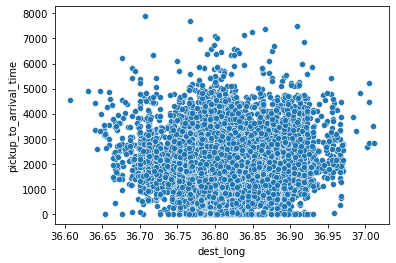

In [44]:
model_dest_long = LinearRegression()
model_dest_long.fit(X=train[["dest_long"]], y=train["pickup_to_arrival_time"])
sns.scatterplot(x="dest_long", y="pickup_to_arrival_time", data=train)

In [45]:
print('The estimated regression function is:\n\
pickup_to_arrival_time =', np.round(model_dest_long.intercept_,2), 
      '+', np.round(model_dest_long.coef_[0],2), '* dest_long')

The estimated regression function is:
pickup_to_arrival_time = -51134.87 + 1431.34 * dest_long


<AxesSubplot:xlabel='dest_long', ylabel='dest_lat'>

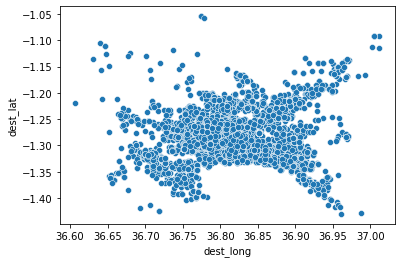

In [47]:
model_dest = LinearRegression()
model_dest.fit(X=train[["dest_long"]], y=train["dest_lat"])
sns.scatterplot(x="dest_long", y="dest_lat", data=train)